In [3]:
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
%matplotlib inline
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [4]:
power_data = power_data.set_index('구분')
power_data = power_data.drop(['합계', '개성', '경기', '서울'], errors='ignore')
power_data = power_data.drop('합계', axis=1)
power = power_data[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [7]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

# 덴드로그램

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

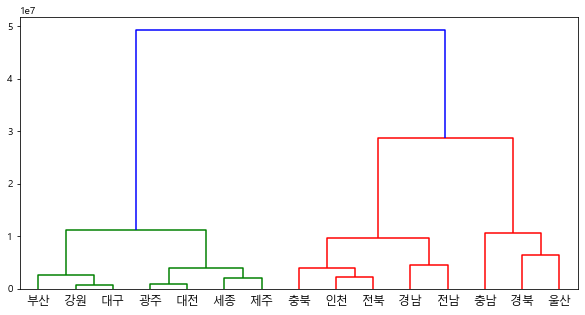

In [8]:
plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')
dendrogram(link_dist, labels=power.index)
plt.show()

# 클러스터링 (KMeans)

In [9]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=3).fit(power)
print(k.n_clusters)

3


In [11]:
power['클러스터'] = k.labels_
power.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,0
경남,8667737,18053778,2
경북,8487402,30115601,1
광주,3174973,2910768,0
대구,5470438,5862633,0
대전,3955921,2608343,0
부산,7582169,7512588,0
세종,645424,1502922,0
울산,3649386,25883132,1


In [12]:
power.drop('클러스터', axis = 1, inplace = True) ; power.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [13]:
centers = k.cluster_centers_ # 내부변수 : 알고리즘 수행 된 후 결과로 얻어진 data
centers

array([[ 4191629.42857143,  3805868.14285714],
       [ 6433742.33333333, 31018896.        ],
       [ 6245553.6       , 16144968.6       ]])

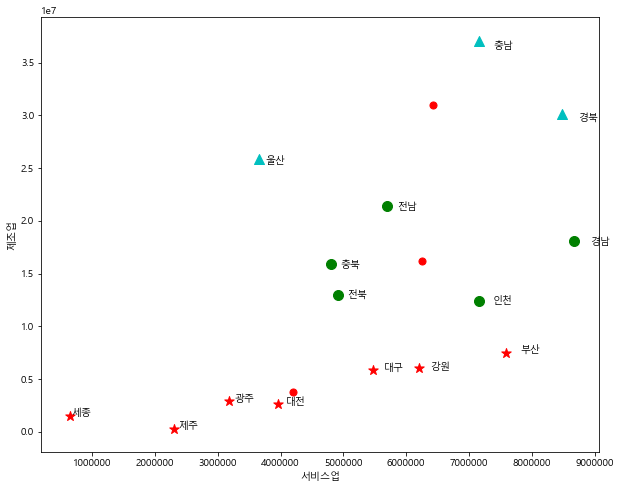

In [16]:
my_markers=['*', '^', 'o', '^', '.', ',', '1', '2'] # '별', '세모', '동그라미', '세모', '점', ....
my_color = ['r', 'c', 'g', 'b', 'g', 'k', 'r', 'y'] # '빨강', .....

plt.figure(figsize = (10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c = my_color[label], marker = my_markers[label], s = 100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s = 50)

# 스케일링 (표준 정규화)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


## 정규화 이후의 클러스터링

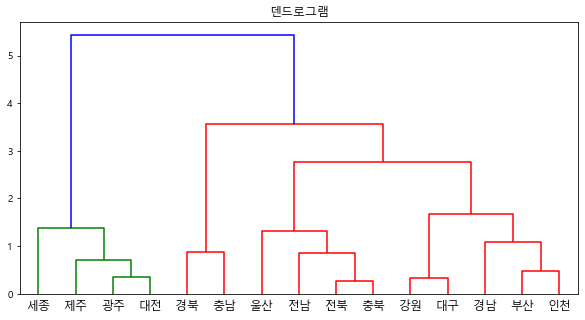

In [20]:
Z = linkage(power, metric = 'euclidean', method = 'ward') # 유클리드 거리를 이용해 Linkage Matrix를 생성

plt.figure(figsize = (10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels = power.index)
plt.show()

In [23]:
k = KMeans(n_clusters = 4).fit(power)

In [25]:
centers = k.cluster_centers_

In [26]:
centers

array([[ 1.12104758,  1.85861879],
       [-0.25141418,  0.52243609],
       [-1.25649503, -1.06099427],
       [ 0.75790833, -0.31260097]])

### plt.clf() # clear figure
- 창은 닫지 않고, 생성한 그래프를 clear 한다.
- 즉, 열린 창에 그림을 지우고 다른 그림을 그릴 수 있습니다

### plt.close()
- 그림 창을 완전히 닫습니다.

<Figure size 432x288 with 0 Axes>

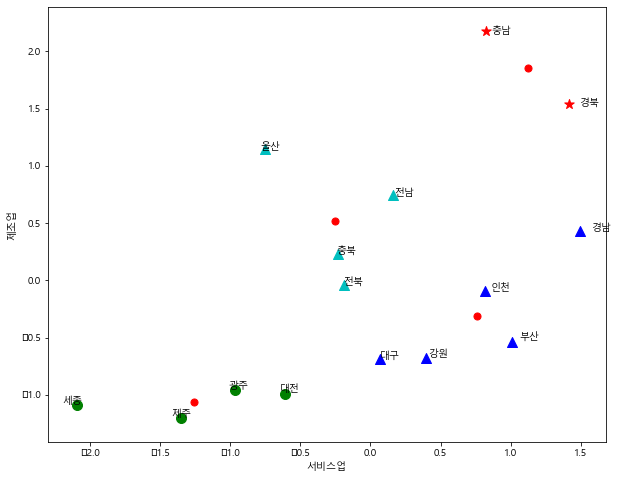

In [38]:
plt.clf()
plt.figure(figsize = (10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c = my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
                   
for i in range(k.n_clusters):
             plt.scatter(centers[i][0], centers[i][1], c = 'r', s = 50)

# 모든 특성을 고려한 클러스터링 (두개가 아니라)

In [29]:
power_data.head().T

구분,강원,경남,경북,광주,대구
주거용,1940933,4260988,3302463,1954876,3151904
공공용,1400421,1427560,1578115,565527,826396
서비스업,6203749,8667737,8487402,3174973,5470438
업무용합계,7604170,10095297,10065517,3740500,6296834
농림어업,607139,2141813,1747462,74608,69142
광업,398287,95989,224568,2898,5858
제조업,6002286,18053778,30115601,2910768,5862633
식료품제조,546621,932743,566071,161072,212626
"섬유,의류",13027,346974,3780171,295922,1057342
"목재,나무",19147,60160,72680,6782,16215


In [39]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계'], axis = 1, errors='Ignore')
power2[:] = scaler.fit_transform(power2[:])

KeyError: "None of ['구분'] are in the columns"

# DBSCAN

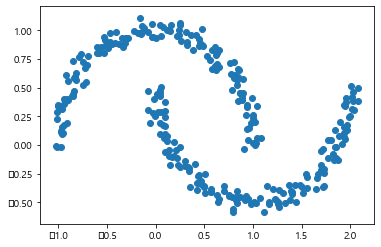

In [40]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples = 300, noise = 0.05, random_state = 11)
plt.scatter(X[:,0], X[:,1])
plt.show()

## plt.scatter()
- c : color, sequence, or sequence of color, optional
    - The maker color.

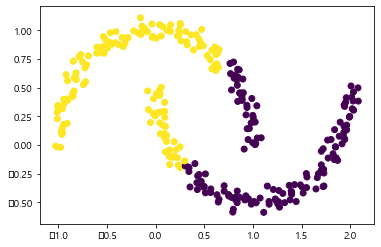

In [45]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predict)

# DBSCAN
- eps:반경
- min_samples:최소 샘플 수(반경 내)

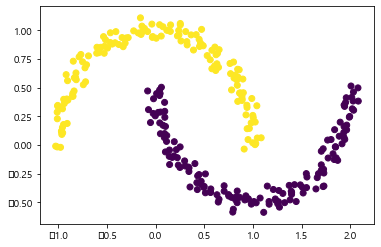

In [42]:
dbscan = DBSCAN(eps=0.2, min_samples = 10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predict)

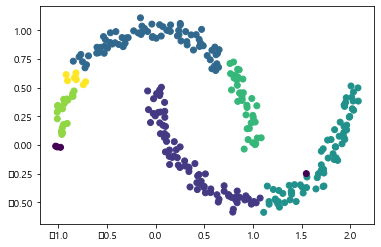

In [46]:
dbscan = DBSCAN(eps=0.1, min_samples = 5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predict)

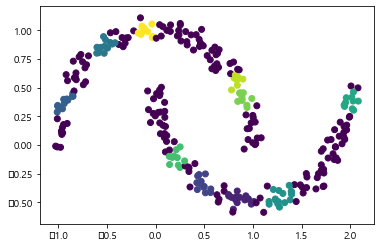

In [47]:
dbscan = DBSCAN(eps=0.1, min_samples = 10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predict)

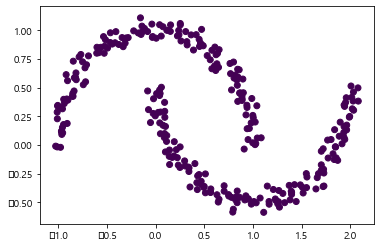

In [48]:
dbscan = DBSCAN(eps=0.5, min_samples = 10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predict)

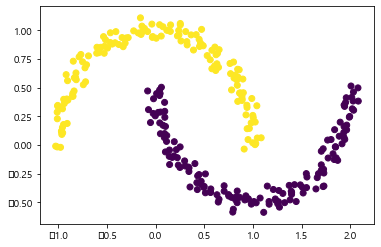

In [49]:
dbscan = DBSCAN(eps=0.2, min_samples = 6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predict)